In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score



In [2]:
def load_csv(city):
    needed_columns = ['review_scores_rating','xgb_predict_avg','rf_predict_avg']
    return pd.read_csv(f'../data/cities/finished/listings_{city}_finished.csv', usecols=needed_columns)

In [3]:
def print_ml_statistics_old(df):
    perc_neg_refs = round(df[df.review_scores_rating < 4].shape[0] / df.shape[0] * 100, 2)
    print(f'Percentage of reviews below 4: {perc_neg_refs} %')
    
    result = np.sqrt(mean_squared_error(df.review_scores_rating, df.xgb_predict_avg))
    print(f'RMSE XGBoost: {result}')
    
    result = np.sqrt(mean_squared_error(df.review_scores_rating, df.rf_predict_avg))
    print(f'RMSE RandomForest: {result}')

    result = r2_score(df.review_scores_rating, df.xgb_predict_avg)
    print(f'r2_score XGBoost: {result}')
    
    result = r2_score(df.review_scores_rating, df.rf_predict_avg)
    print(f'r2_score RandomForest: {result}')
    
    result = accuracy_score(np.round(df.review_scores_rating).astype('int'), np.round(df.xgb_predict_avg).astype('int'))
    print(f'accuracy XGBoost: {result}')
    
    result = accuracy_score(np.round(df.review_scores_rating).astype('int'), np.round(df.rf_predict_avg).astype('int'))
    print(f'accuracy RandomForest: {result}') 

    print('Mean comparisson')
    
    df['mean'] = df.review_scores_rating.mean()

    result = np.sqrt(mean_squared_error(df.review_scores_rating, df['mean']))
    print(f'RMSE mean: {result}')

    result = np.sqrt(r2_score(df.review_scores_rating, df['mean']))
    print(f'r2_score mean: {result}')

    result = accuracy_score(np.round(df.review_scores_rating).astype('int'), np.round(df['mean']).astype('int'))
    print(f'accuracy mean: {result}')

    sns.histplot(df[df.review_scores_rating >= 4].review_scores_rating)
    plt.show()
    sns.scatterplot(x='review_scores_rating', y='xgb_predict_avg', data=df, s=4)
    plt.show()
    sns.scatterplot(x='review_scores_rating', 
                    y='xgb_predict_avg', 
                    data=df[(df.review_scores_rating >= 4) & (df.xgb_predict_avg >= 4)], s=4)
    plt.show()

In [4]:
def print_ml_statistics(df, city_name):
    perc_neg_refs = round(df[df.review_scores_rating < 4].shape[0] / df.shape[0] * 100, 2)
    print(f'Percentage of reviews below 4: {perc_neg_refs} %')
    
    result = np.sqrt(mean_squared_error(df.review_scores_rating, df.xgb_predict_avg))
    print(f'RMSE XGBoost: {round(result, 3)}')
    
    result = np.sqrt(mean_squared_error(df.review_scores_rating, df.rf_predict_avg))
    print(f'RMSE RandomForest: {round(result, 3)}')

    result = r2_score(df.review_scores_rating, df.xgb_predict_avg)
    print(f'r2_score XGBoost: {round(result, 3)}')
    
    result = r2_score(df.review_scores_rating, df.rf_predict_avg)
    print(f'r2_score RandomForest: {round(result, 3)}')
    
    result = accuracy_score(np.round(df.review_scores_rating).astype('int'), np.round(df.xgb_predict_avg).astype('int'))
    print(f'accuracy XGBoost: {round(result, 3)}')
    
    result = accuracy_score(np.round(df.review_scores_rating).astype('int'), np.round(df.rf_predict_avg).astype('int'))
    print(f'accuracy RandomForest: {round(result, 3)}') 

    print('Mean comparisson')
    
    df['mean'] = df.review_scores_rating.mean()

    result = np.sqrt(mean_squared_error(df.review_scores_rating, df['mean']))
    print(f'RMSE mean: {round(result, 3)}')

    result = np.sqrt(r2_score(df.review_scores_rating, df['mean']))
    print(f'r2_score mean: {round(result, 3)}')

    result = accuracy_score(np.round(df.review_scores_rating).astype('int'), np.round(df['mean']).astype('int'))
    print(f'accuracy mean: {round(result, 3)}')

    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    
    sns.histplot(df[df.review_scores_rating >= 4].review_scores_rating, ax=axes[0])
    axes[0].set_title("True rating distribution")
    axes[0].set_xlabel("Review Scores Rating")
    axes[0].set_ylabel("Count")

    sns.scatterplot(x='review_scores_rating', y='xgb_predict_avg', data=df, s=4, ax=axes[1])
    axes[1].set_title("True/Predicted overview")
    axes[1].set_xlabel("Review Scores Rating")
    axes[1].set_ylabel("XGB Predict Avg")
    
    sns.scatterplot(x='review_scores_rating', 
                    y='xgb_predict_avg', 
                    data=df[(df.review_scores_rating >= 4) & (df.xgb_predict_avg >= 4)], 
                    s=4, ax=axes[2])
    axes[2].set_title("True/Predicted focussed (4-5)")
    axes[2].set_xlabel("Review Scores Rating")
    axes[2].set_ylabel("XGB Predict Avg")
    
    fig.suptitle(city_name, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(f"{city_name}.png")
     plt.show()

Percentage of reviews below 4: 0.75 %
RMSE XGBoost: 0.231
RMSE RandomForest: 0.231
r2_score XGBoost: -0.001
r2_score RandomForest: 0.003
accuracy XGBoost: 0.932
accuracy RandomForest: 0.925
Mean comparisson
RMSE mean: 0.231
r2_score mean: 0.0
accuracy mean: 0.923


C:\Users\big10\anaconda3\envs\agent_tutorial\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


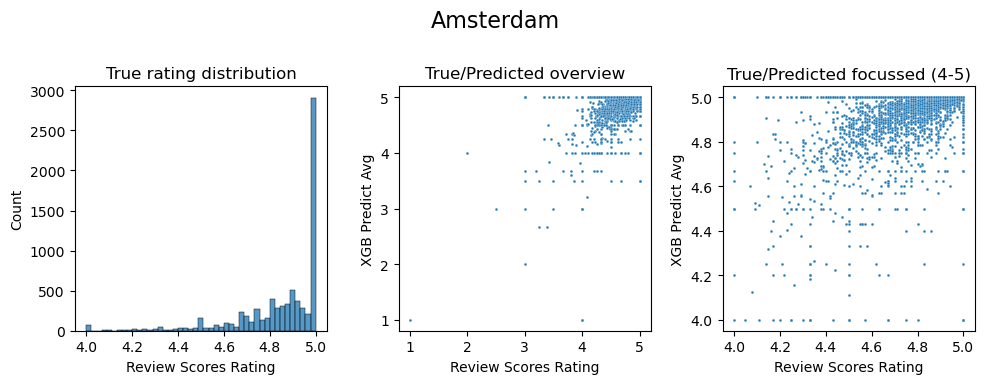

In [5]:
print_ml_statistics(load_csv('Amsterdam'), 'Amsterdam')

Percentage of reviews below 4: 4.8 %
RMSE XGBoost: 0.382
RMSE RandomForest: 0.375
r2_score XGBoost: 0.084
r2_score RandomForest: 0.117
accuracy XGBoost: 0.817
accuracy RandomForest: 0.819
Mean comparisson
RMSE mean: 0.399
r2_score mean: 0.0
accuracy mean: 0.776


C:\Users\big10\anaconda3\envs\agent_tutorial\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


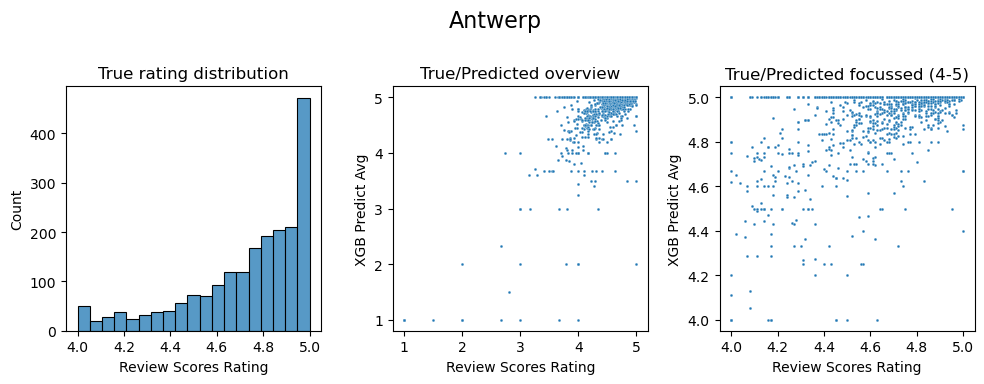

In [6]:
print_ml_statistics(load_csv('Antwerp'), 'Antwerp')

Percentage of reviews below 4: 2.21 %
RMSE XGBoost: 0.317
RMSE RandomForest: 0.306
r2_score XGBoost: -0.018
r2_score RandomForest: 0.053
accuracy XGBoost: 0.869
accuracy RandomForest: 0.864
Mean comparisson
RMSE mean: 0.314
r2_score mean: 0.0
accuracy mean: 0.839


C:\Users\big10\anaconda3\envs\agent_tutorial\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


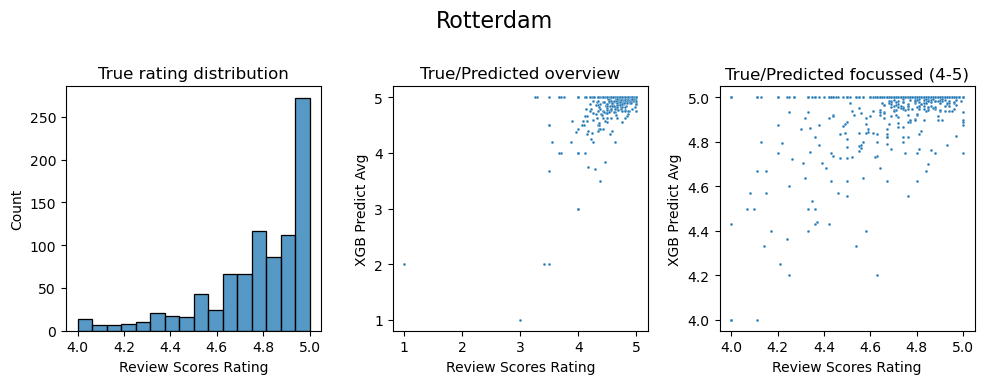

In [7]:
print_ml_statistics(load_csv('Rotterdam'), 'Rotterdam')

Percentage of reviews below 4: 3.23 %
RMSE XGBoost: 0.307
RMSE RandomForest: 0.307
r2_score XGBoost: 0.561
r2_score RandomForest: 0.561
accuracy XGBoost: 0.902
accuracy RandomForest: 0.895
Mean comparisson
RMSE mean: 0.463
r2_score mean: 0.0
accuracy mean: 0.867


C:\Users\big10\anaconda3\envs\agent_tutorial\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


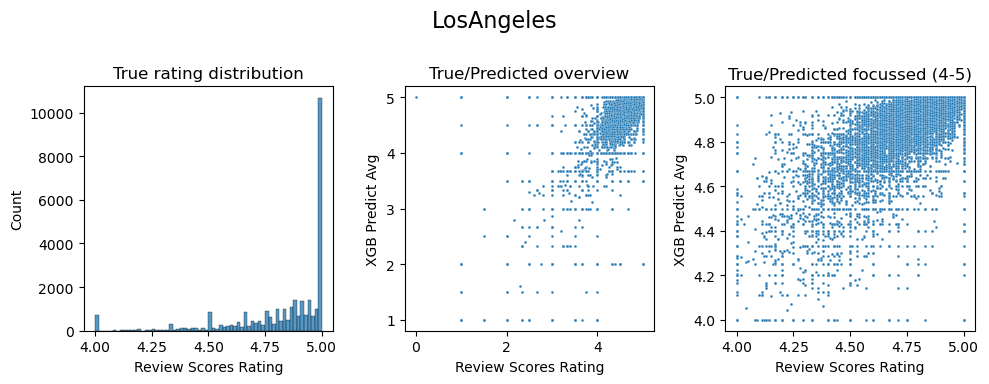

In [8]:
print_ml_statistics(load_csv('LosAngeles'), 'LosAngeles')